In [2]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

df = pd.read_csv("auto-mpg.csv")
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


In [3]:
mpg_df = df[['mpg','weight']]
mpg_df

,mpg,weight
0,18.0,3504
1,15.0,3693
2,18.0,3436
3,16.0,3433
4,17.0,3449
...,...,...
393,27.0,2790
394,44.0,2130
395,32.0,2295
396,28.0,2625


In [6]:
X = mpg_df[['weight']]
y = mpg_df['mpg']
model = LinearRegression()
model.fit(X,y)
model.coef_

array([-0.00767661])

In [7]:
model.intercept_

46.31736442026565

In [11]:
model.predict(mpg_df[['weight']])

r2_score(
    y_true = mpg_df.mpg,
    y_pred = model.predict(mpg_df[['weight']])
)


0.6917929800341573

In [13]:
!pip install plotnine

from plotnine import ggplot, aes, geom_point, geom_line
from plotnine.themes import theme_minimal

mpg_df['fitted'] = model.predict(mpg_df[['weight']])


   ---------------------------------------- 0.0/1.3 MB ? eta -:--:--
   -------- ------------------------------- 0.3/1.3 MB ? eta -:--:--
   ------------------------ --------------- 0.8/1.3 MB 2.0 MB/s eta 0:00:01
   -------------------------------- ------- 1.0/1.3 MB 2.0 MB/s eta 0:00:01
   ---------------------------------------- 1.3/1.3 MB 2.1 MB/s eta 0:00:00


C:\Users\raksh\AppData\Local\Temp\ipykernel_16760\1579835337.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


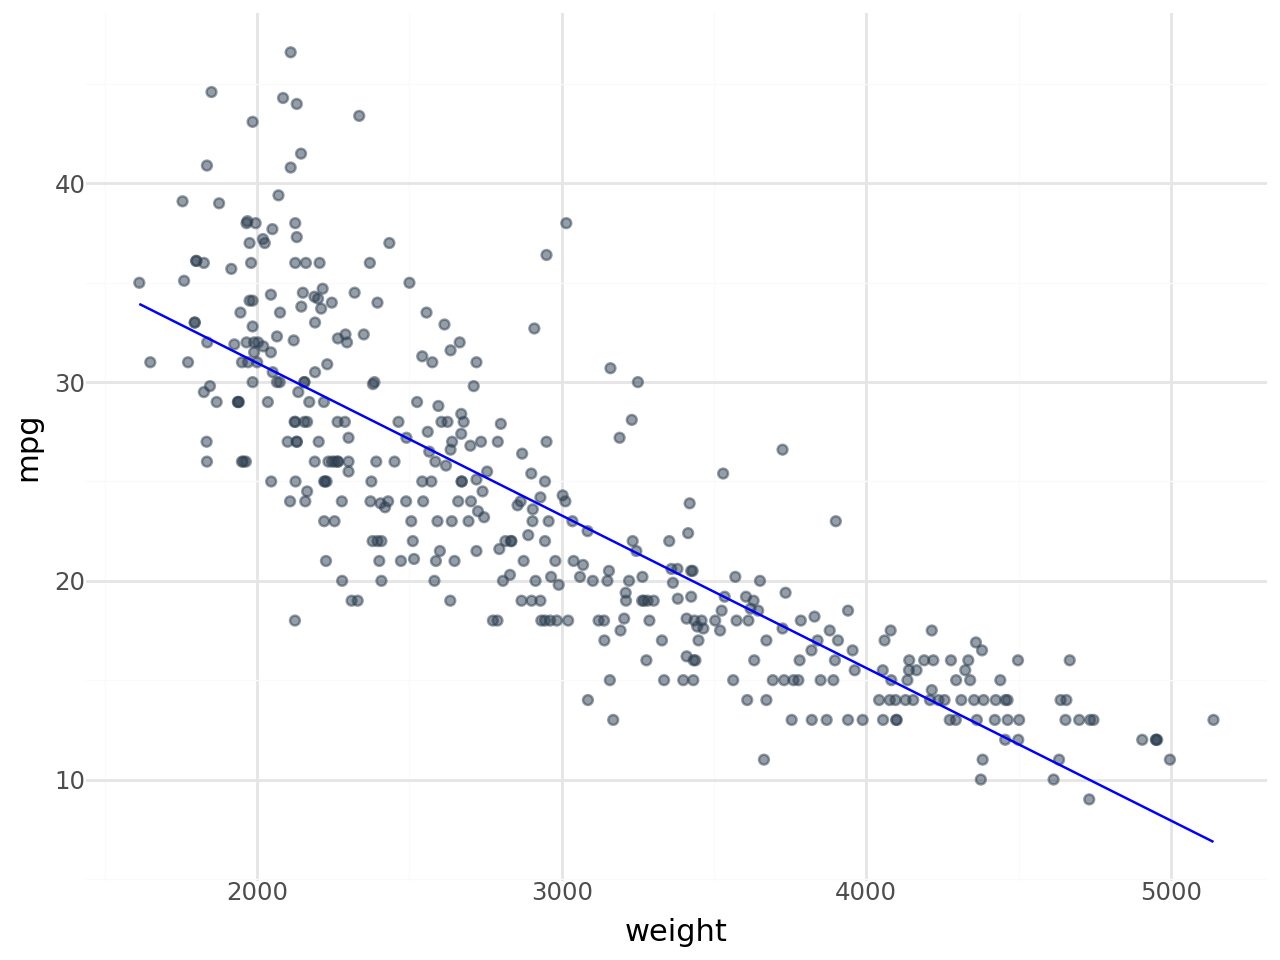

In [20]:
ggplot(aes('weight', 'mpg'),mpg_df)\
  + geom_point(alpha = 0.5, color = "#2c3e50")\
  + geom_line(aes(y = 'fitted'),color = 'blue')\
  + theme_minimal()